# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh berasal dari Kaggle, sebuah platform yang menyediakan berbagai dataset publik untuk kebutuhan penelitian dan pengembangan model machine learning.

   Dataset yang digunakan judul **‘Liver Cancer Dataset’**. Dataset ini berisi informasi mengenai data demografis, gaya hidup, serta faktor - faktor medis pasien yang relevan dengan penyakit hati dan kanker hati.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("liver_cancer_dataset.csv")
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7),

In [4]:
df.describe(include="all")

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
count,5000.000000,5000,5000.00000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000
unique,NaN,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Female,NaN,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,NaN,NaN
freq,NaN,2506,NaN,2014,2407,NaN,NaN,NaN,NaN,NaN,NaN,2027,NaN,NaN
mean,57.222800,NaN,25.90464,NaN,NaN,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,NaN,0.199200,0.217800
std,15.799224,NaN,5.10520,NaN,NaN,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,NaN,0.399439,0.412792
min,30.000000,NaN,8.10000,NaN,NaN,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,44.000000,NaN,22.50000,NaN,NaN,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,NaN,0.000000,0.000000
50%,57.000000,NaN,25.90000,NaN,NaN,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,NaN,0.000000,0.000000
75%,71.000000,NaN,29.30000,NaN,NaN,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,NaN,0.000000,0.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Cek missing value dan duplikasi

In [5]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
alcohol_consumption,0
smoking_status,0
hepatitis_b,0
hepatitis_c,0
liver_function_score,0
alpha_fetoprotein_level,0
cirrhosis_history,0


In [6]:
df.duplicated().sum()

np.int64(0)

## Korelasi fitur numerik

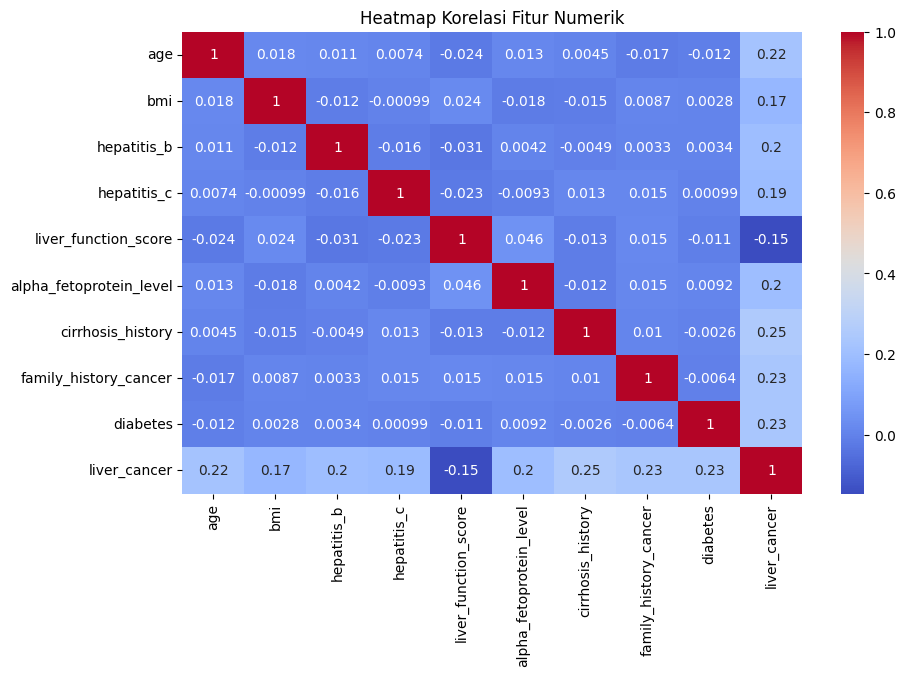

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Distribusi kelas target

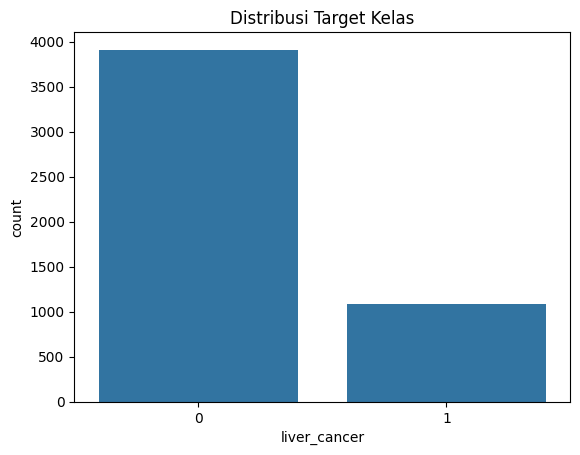

In [8]:
sns.countplot(data=df, x="liver_cancer")
plt.title("Distribusi Target Kelas")
plt.show()

## Distribusi fitur numerik

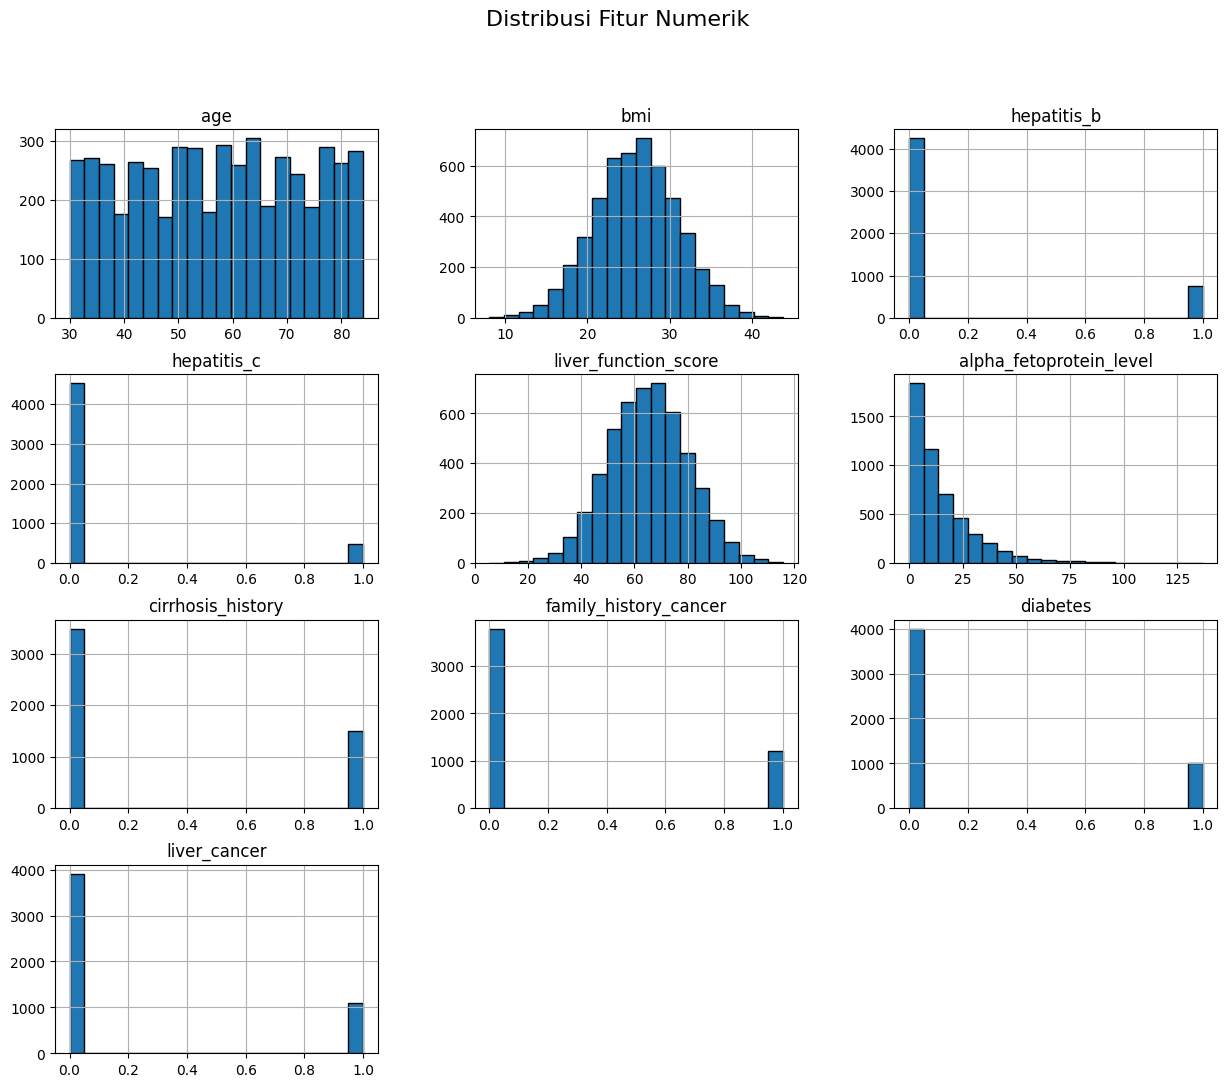

In [9]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

## Distribusi fitur kategorikal

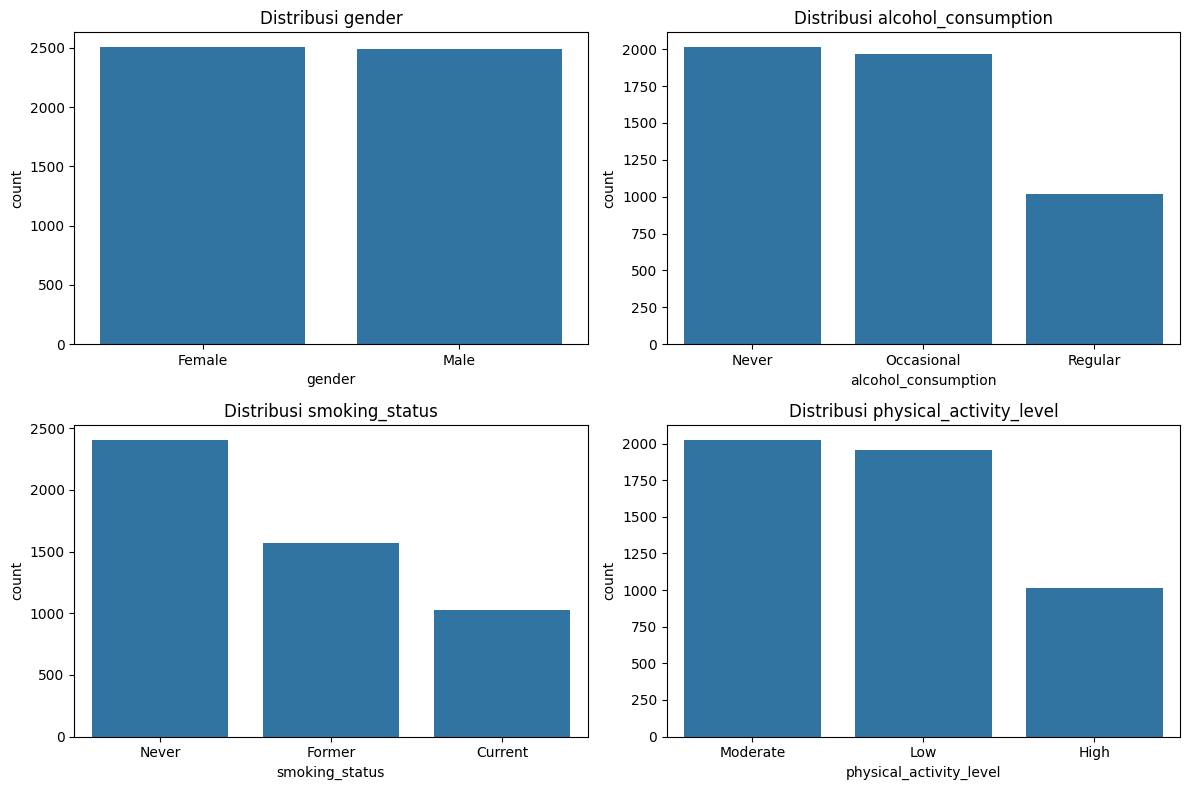

In [10]:
cat_cols = df.select_dtypes(include=["object"]).columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

## Cek outlier

In [11]:
num_continuous = ["bmi", "liver_function_score", "alpha_fetoprotein_level"]

Q1 = df[num_continuous].quantile(0.25)
Q3 = df[num_continuous].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_continuous] < (Q1 - 1.5 * IQR)) | (df[num_continuous] > (Q3 + 1.5 * IQR)))
outliers_sum = outliers.sum()
print(outliers_sum)


bmi                         43
liver_function_score        28
alpha_fetoprotein_level    237
dtype: int64


## Visualisasi outlier

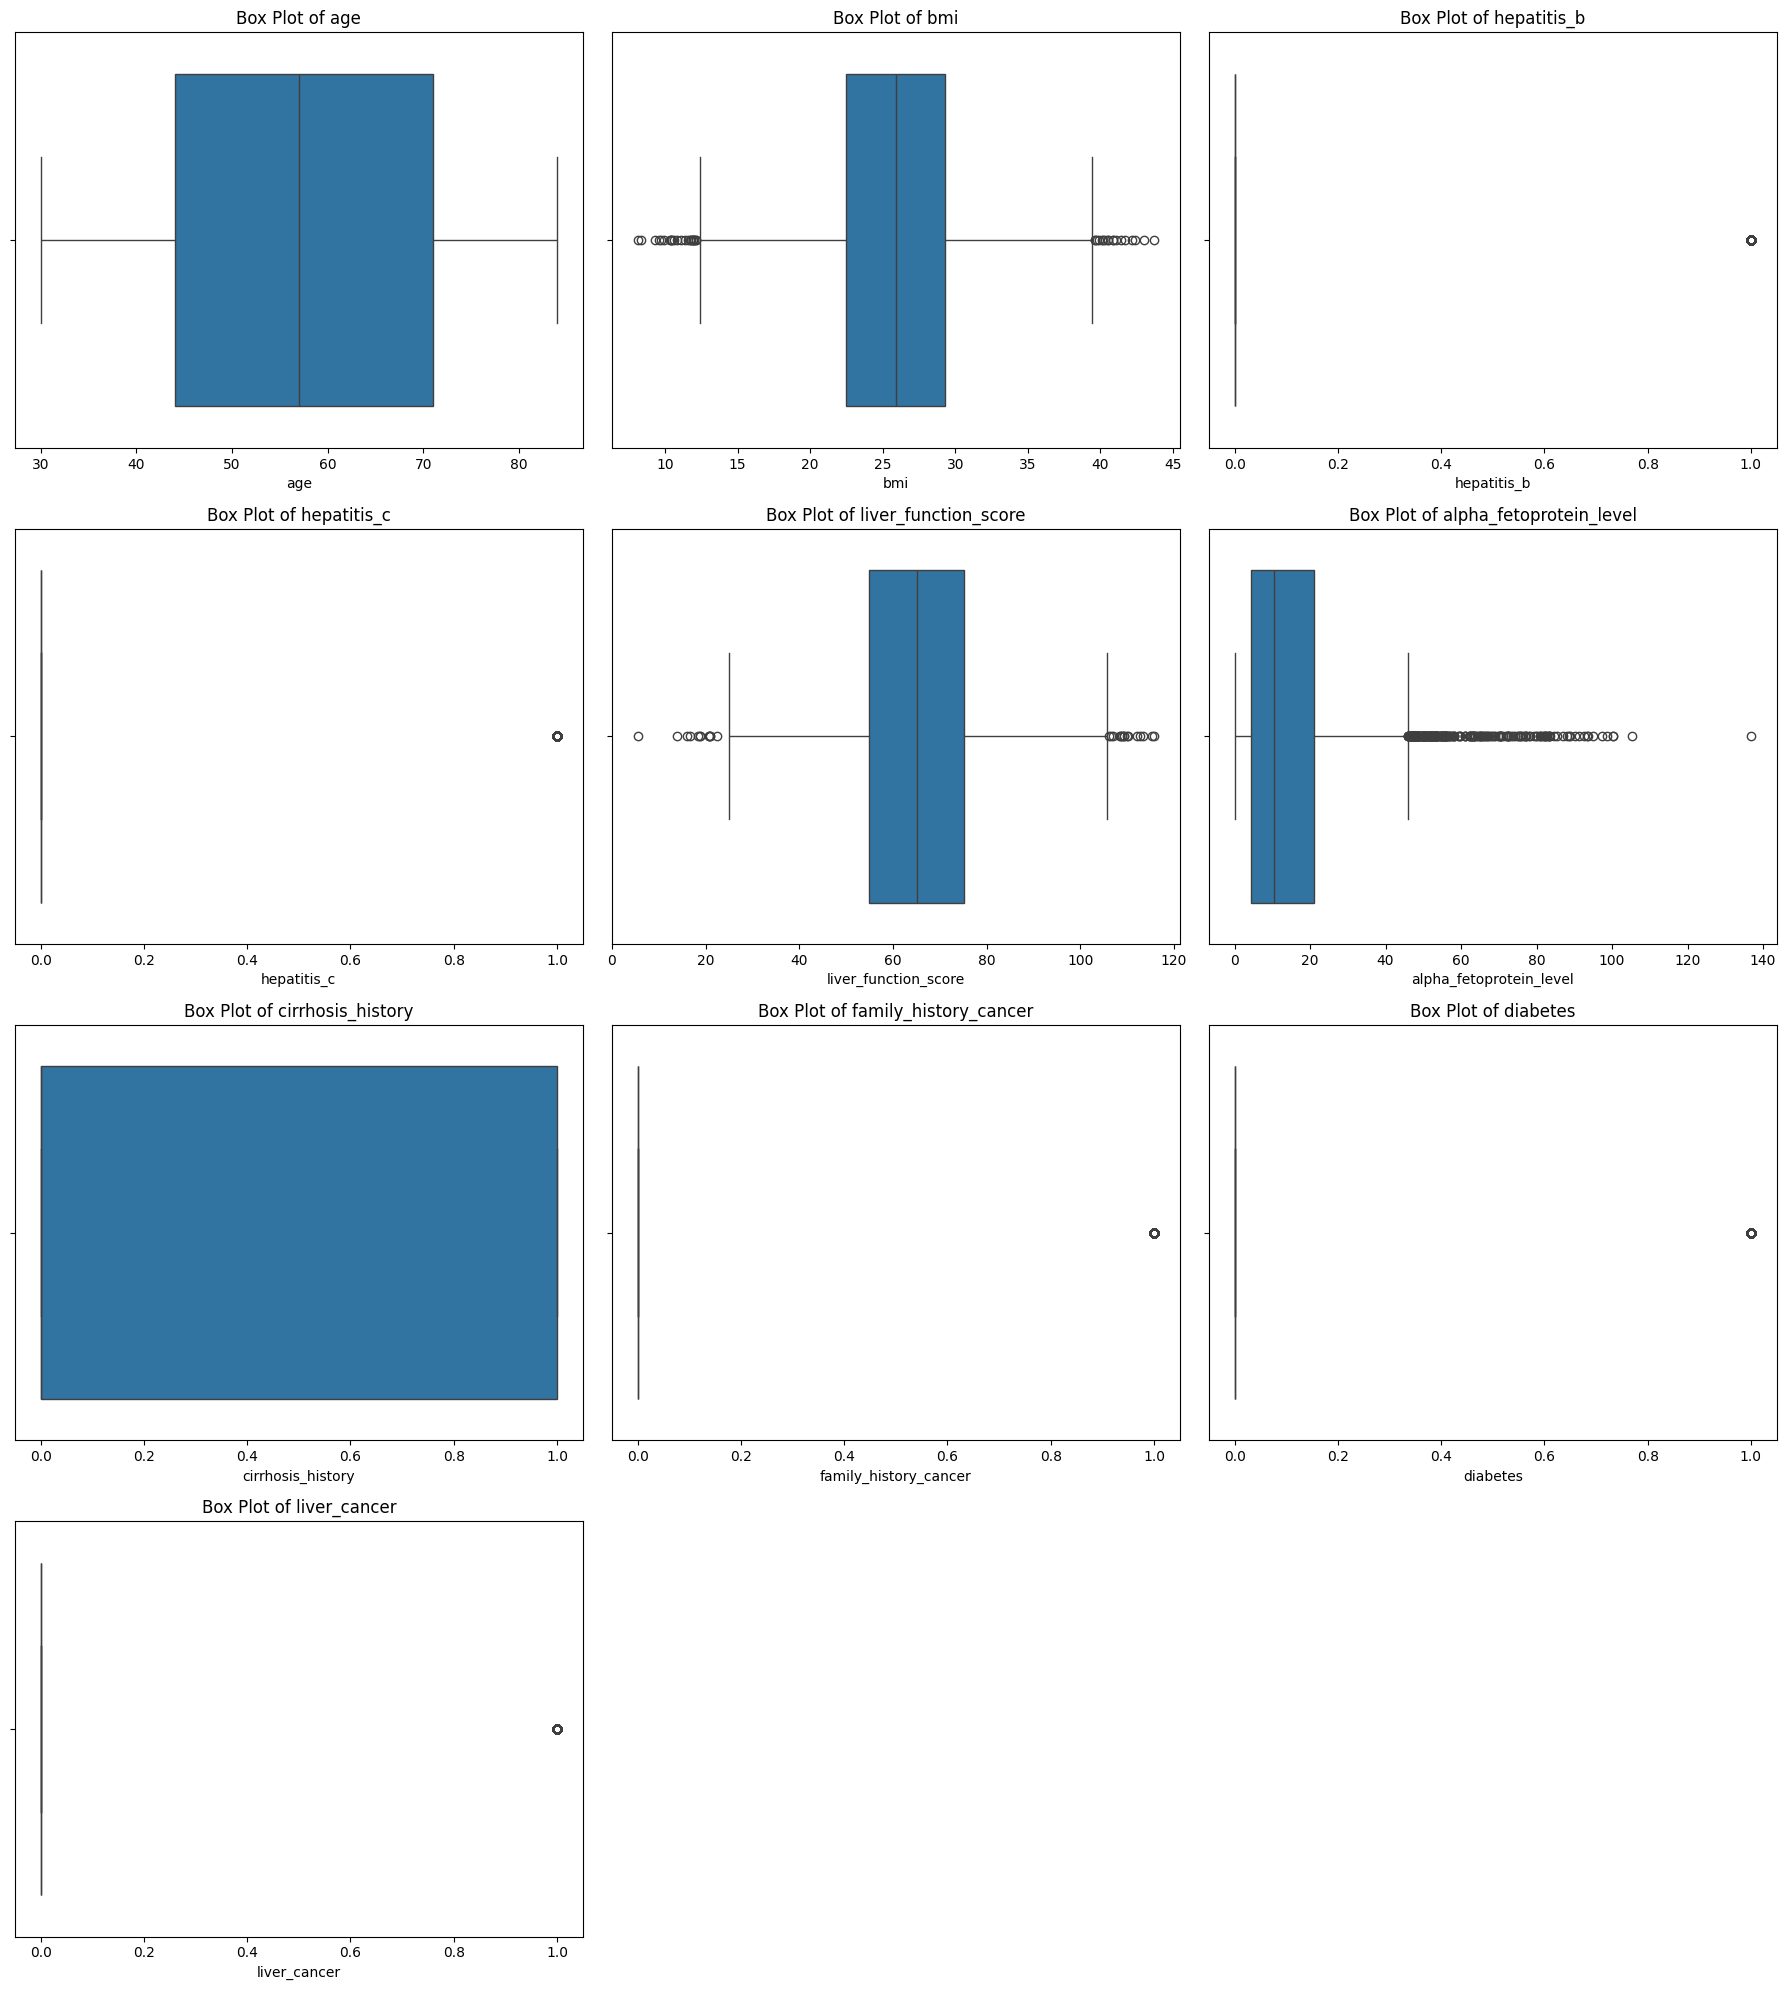

In [12]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
n = len(numeric_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5*rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Persentase kelas target (%)

In [13]:
df["liver_cancer"].value_counts(normalize=True) * 100

,proportion
liver_cancer,
0,78.22
1,21.78


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Split data

In [14]:
X = df.drop("liver_cancer", axis=1)
y = df["liver_cancer"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (4000, 13)  Test shape: (1000, 13)


## Menangani outlier

In [15]:
numerical_cols = ["bmi", "liver_function_score", "alpha_fetoprotein_level"]

# Hitung outlier sebelum replace
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numerical_cols:
    median_val = X_train[col].median()
    X_train[col] = np.where((X_train[col] < lower_bound[col]) | (X_train[col] > upper_bound[col]),
                             median_val, X_train[col])
    X_test[col]  = np.where((X_test[col] < lower_bound[col]) | (X_test[col] > upper_bound[col]),
                             median_val, X_test[col])

## Visualisasi setelah menangani outlier

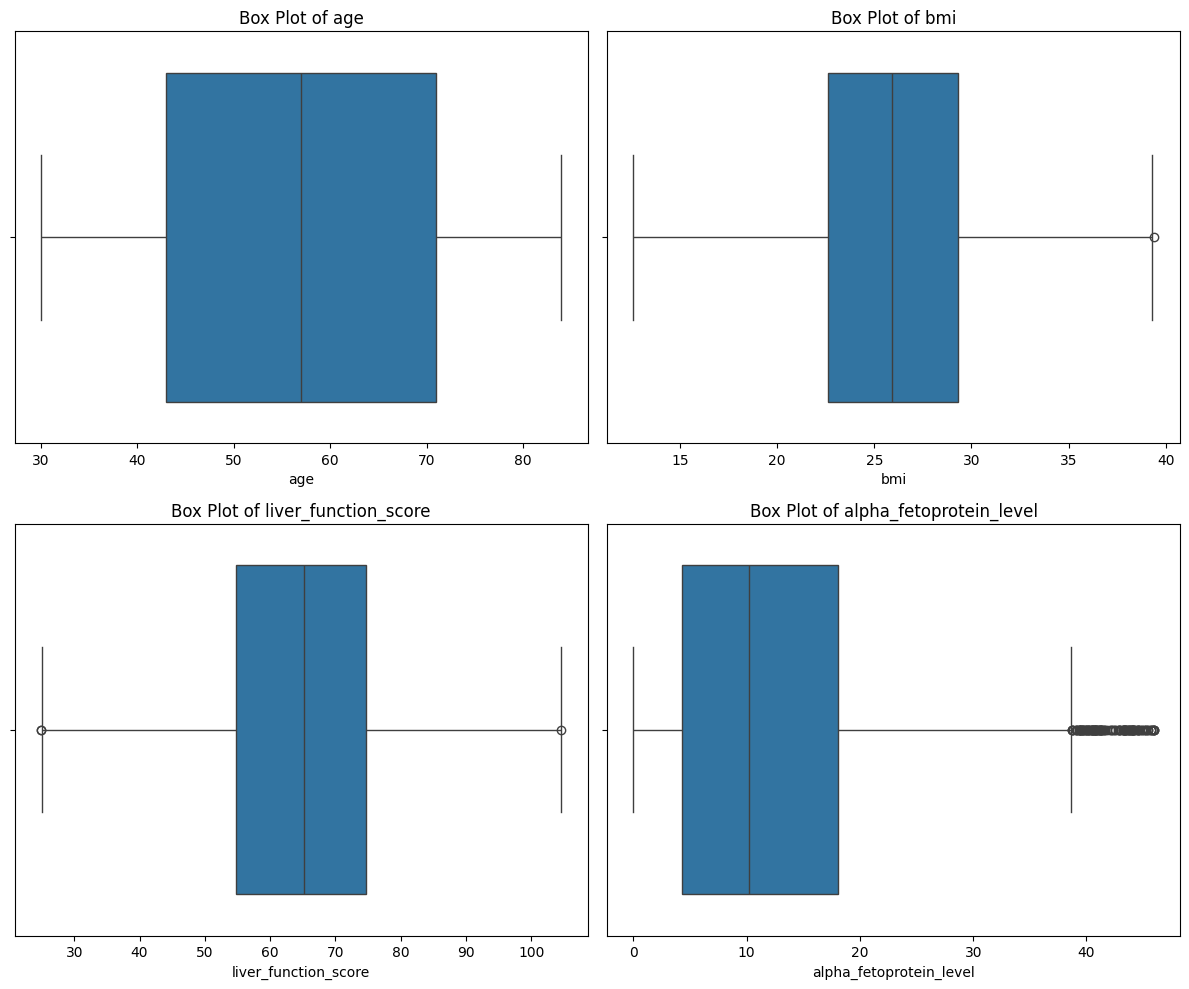

In [16]:
numerical_cols = ["age", "bmi", "liver_function_score", "alpha_fetoprotein_level"]

n = len(numerical_cols)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 5*rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.boxplot(x=X_train[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

# hapus axes yang tidak terpakai
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Encoding

In [17]:
# Label Encoder untuk kolom gender
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

# One Hot Encoder untuk kolom yang punya banyak kategori
cat_cols = ['alcohol_consumption', 'smoking_status', 'physical_activity_level']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

train_ohe = ohe.fit_transform(X_train[cat_cols])
test_ohe = ohe.transform(X_test[cat_cols])

train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index).astype(int)
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index).astype(int)

# Gabung ke data aslinya
X_train = pd.concat([X_train.drop(cat_cols, axis=1), train_ohe], axis=1)
X_test = pd.concat([X_test.drop(cat_cols, axis=1), test_ohe], axis=1)

## Normalisasi / Scaling

In [18]:
scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]  = scaler.transform(X_test[numerical_cols])

print("\nCek range setelah scaling:")
print("Train min:\n", X_train[numerical_cols].min())
print("Train max:\n", X_train[numerical_cols].max())


Cek range setelah scaling:
Train min:
 age                        0.0
bmi                        0.0
liver_function_score       0.0
alpha_fetoprotein_level    0.0
dtype: float64
Train max:
 age                        1.0
bmi                        1.0
liver_function_score       1.0
alpha_fetoprotein_level    1.0
dtype: float64


## Penyeimbangan data dengan SMOTE

In [19]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDistribusi sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi sesudah SMOTE:\n", y_train_res.value_counts())


Distribusi sebelum SMOTE:
 liver_cancer
0    3129
1     871
Name: count, dtype: int64
Distribusi sesudah SMOTE:
 liver_cancer
1    3129
0    3129
Name: count, dtype: int64


## Simpan hasil preprocessing

In [20]:
train_res = pd.concat([X_train_res, y_train_res], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train_res.to_csv("train_liver.csv", index=False)
test.to_csv("test_liver.csv", index=False)

print("train_liver shape:", train_res.shape, " test_liver shape:", test.shape)

train_liver shape: (6258, 20)  test_liver shape: (1000, 20)


In [21]:
train_res.head()

,age,gender,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,alcohol_consumption_Never,alcohol_consumption_Occasional,alcohol_consumption_Regular,smoking_status_Current,smoking_status_Former,smoking_status_Never,physical_activity_level_High,physical_activity_level_Low,physical_activity_level_Moderate,liver_cancer
0,0.018519,1,0.470149,0,0,0.562108,0.468451,1,0,1,0,0,1,0,1,0,0,1,0,1
1,0.370370,1,0.660448,1,0,0.494354,0.099652,0,0,0,0,0,1,0,0,1,0,1,0,0
2,0.277778,1,0.701493,0,0,0.390213,0.389687,1,0,0,0,1,0,1,0,0,0,1,0,0
3,0.370370,0,0.611940,0,0,0.484316,0.065709,0,0,0,1,0,0,0,0,1,0,1,0,0
4,0.814815,0,0.496269,0,0,0.437892,0.258050,1,1,0,1,0,0,1,0,0,0,0,1,1


In [22]:
test.head()

,age,gender,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,alcohol_consumption_Never,alcohol_consumption_Occasional,alcohol_consumption_Regular,smoking_status_Current,smoking_status_Former,smoking_status_Never,physical_activity_level_High,physical_activity_level_Low,physical_activity_level_Moderate,liver_cancer
3090,0.722222,1,0.630597,0,0,0.749059,0.526110,0,1,1,1,0,0,0,1,0,1,0,0,1
4467,0.092593,1,0.634328,0,0,0.397742,0.426675,0,1,0,0,0,1,1,0,0,0,0,1,0
63,0.796296,1,0.171642,0,0,0.127980,0.777198,1,0,0,1,0,0,0,1,0,0,0,1,1
2102,0.796296,0,0.130597,1,0,0.421581,0.367058,0,0,0,1,0,0,0,0,1,0,0,1,0
4151,0.759259,0,0.973881,0,0,0.696361,0.173412,0,0,0,1,0,0,0,1,0,1,0,0,0
